In [38]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.feature_selection import RFECV


#svm
from sklearn import datasets
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, confusion_matrix, roc_curve


#geotools
import geopy
import geocoder
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim

ModuleNotFoundError: No module named 'geopy'

In [19]:
data = pd.read_csv("MVC.csv")
print(data.dtypes)
print(data.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [20]:
def cyclist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def motorist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def pedestrian_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def rush_to_bin(x):
    if 7.5<x<9 or 16.5<x<19:
        return 1
    else:
        return 0
def persons_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def persons_to_class(x):
    if x[2] == 1:
        return 1
    if x[3] == 1:
        return 2
    if x[4] == 1:
        return 3
    else:
        return 0
def multiple_personas(x):
    return x[2]+x[3]+x[4]

In [21]:
data["CYCLIST_AFFECTED"] = data["NUMBER OF CYCLIST INJURED"]+data["NUMBER OF CYCLIST KILLED"]
data["MOTORIST_AFFECTED"] = data["NUMBER OF MOTORIST INJURED"]+data["NUMBER OF MOTORIST KILLED"]
data["PEDESTRIAN_AFFECTED"] = data["NUMBER OF PEDESTRIANS INJURED"]+data["NUMBER OF PEDESTRIANS KILLED"]
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']
data['PERSONS_TF']= data['PERSONS_AFFECTED'].apply(persons_to_bin)
data['MOTORIST_TF']= data["MOTORIST_AFFECTED"].apply(motorist_to_bin)
data['CYCLIST_TF']= data["CYCLIST_AFFECTED"].apply(cyclist_to_bin)
data['PEDESTRIAN_TF']= data["PEDESTRIAN_AFFECTED"].apply(pedestrian_to_bin)
data['RUSH_TF'] = data['NUMTIME'].apply(rush_to_bin)
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']


In [22]:
value_counts = data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts(ascending=True)
remove = value_counts[value_counts <= 20].index
data = data[~data['CONTRIBUTING FACTOR VEHICLE 1'].isin(remove)]

data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing Too Closely','Unsafe Lane Changing','Passing or Lane Usage Improper','Turning Improperly','Traffic Control Disregarded','Driver Inexperience','Reaction to Uninvolved Vehicle','Unsafe Speed','Fatigued/Drowsy','Alcohol Involvement','Lost Consciousness','Aggressive Driving/Road Rage','Fell Asleep','Illnes','Drugs (illegal)','Drugs (Illegal)','Texting','Outside Car Distraction','Passenger Distraction','Prescription Medication','Failure to Keep Right','Illness','Other Electronic Device','Cell Phone (hand-Held)','Cell Phone (hands-free)','Eating or Drinking','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Physical Disability','Reaction to Other Uninvolved Vehicle','Using On Board Navigation Device','Tinted Windows','Vehicle Vandalism','Cell Phone (hand-held)'],'Human')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Other Vehicular','Oversized Vehicle','Brakes Defective','Steering Failure','Tire Failure/Inadequate','Driverless/Runaway Vehicle','Accelerator Defective','Other Lighting Defects','Tow Hitch Defective','Headlights Defective','Windshield Inadequate'],'Vehicular')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Pavement Slippery','View Obstructed/Limited','Glare','Obstruction/Debris','Pavement Defective','Animals Action','Lane Marking Improper/Inadequate','Traffic Control Device Improper/Non-Working','Shoulders Defective/Improper'],'Environmental')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['80'],'Unspecified')
print(print(data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()))


Human            704049
Unspecified      268015
Vehicular         48156
Environmental     24940
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64
None


In [23]:
factor_dummy = data['CONTRIBUTING FACTOR VEHICLE 1'].str.get_dummies()
data = pd.concat([data,factor_dummy],axis=1)
borough_dummy = data.BOROUGH.str.get_dummies()
data = pd.concat([data,borough_dummy],axis=1)

In [24]:
print(data.dtypes)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [30]:
data.drop(data.columns[1:2],axis=1,inplace=True)
print(data.dtypes)

NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
dtype: object


There are 206887 normal cases and 1162 edge cases where there are multiple classes affected. These edge cases make up about .5% of the dataset. The dataset is already reduced to 19.84% of the original dataset

In [31]:
data['EDGE_CASES'] = data.apply(multiple_personas,axis = 1)
data.EDGE_CASES.value_counts()

0.0    840770
1.0    206611
2.0      1160
3.0         6
Name: EDGE_CASES, dtype: int64

In [32]:
index = data[(data['EDGE_CASES'] != 1)].index
data.drop(index,inplace=True)
print(data.shape)
print(data.dtypes)

(206611, 16)
NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
EDGE_CASES       float64
dtype: object


The breakdown of person classes is dominated by pedestrians (65.8%), followed by motorists (23.67%) and cyclists (10.5%)

In [33]:
data['PERSONS_CLASS'] = data.apply(persons_to_class,axis=1)
data.PERSONS_CLASS.value_counts()

1    136074
3     48814
2     21723
Name: PERSONS_CLASS, dtype: int64

In [47]:
pred = list(zip(data['NUMTIME'],data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp = data['PERSONS_CLASS']
resp.value_counts()

1    136074
3     48814
2     21723
Name: PERSONS_CLASS, dtype: int64

In [35]:
#SMOTE resampling!

sm = SMOTE(random_state=42)
x_res,y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({3: 136074, 1: 136074, 2: 136074})


In [39]:
X_feat = x_res
y = y_res
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,test_size=0.2)

dtc = RandomForestClassifier()
grid={'max_depth':[1,2,3,4,5,10,20,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,50,60]}

gs = GridSearchCV(dtc,grid,cv=3,verbose=True,return_train_score=False,n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  3.4min
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 517.6min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 552.1min finished


,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score
0,gini,30,10,0.501208
1,entropy,30,10,0.499596
2,gini,20,10,0.494300
3,entropy,20,10,0.492965
4,gini,30,20,0.485456
5,entropy,30,20,0.485138
6,gini,20,20,0.482823
7,entropy,20,20,0.482789
8,gini,30,30,0.479293
9,entropy,30,30,0.478085


In [44]:
X_feat = x_res
y = y_res
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(criterion='gini',max_depth=30,min_samples_leaf=10)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.57      0.53     27099
           2       0.51      0.52      0.52     27141
           3       0.52      0.43      0.47     27405

    accuracy                           0.51     81645
   macro avg       0.51      0.51      0.50     81645
weighted avg       0.51      0.51      0.50     81645

Null accuracy on the test set:  2.0037479331251147
Sensitivity/Recall (TPR):  0.5056402719088737
Precision (PPV):  0.5056402719088737
Accuracy: 0.5056402719088737


array([[15378,  5634,  6087],
       [ 8132, 14025,  4984],
       [ 7868,  7657, 11880]])

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

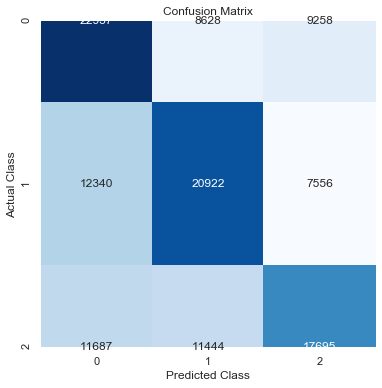

In [41]:
X_train, X_test, y_train, y_test = train_test_split(x_res,y_res, test_size=0.3)
t.fit(X_train,y_train)

test_cf = pd.DataFrame(confusion_matrix(y_test,t.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

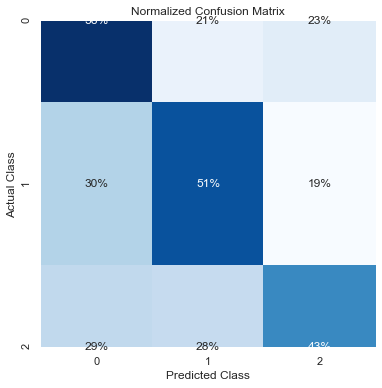

In [42]:
test_cf = confusion_matrix(y_test,t.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

In [46]:
pred2 = list(zip(data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp2 = data['RUSH_TF']
resp2.value_counts()

0    159421
1     47190
Name: RUSH_TF, dtype: int64

In [49]:
#SMOTE resampling!

sm = SMOTE(random_state=42)
x_res2,y_res2 = sm.fit_resample(pred2,resp2)
print('Resampled dataset shape %s' % Counter(y_res2))

Resampled dataset shape Counter({0: 159421, 1: 159421})


In [55]:
X_feat = x_res2
y = y_res2
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,test_size=0.2)

dtc = RandomForestClassifier()
grid={'max_depth':[1,2,3,4,5,10,20,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,50,60]}

gs = GridSearchCV(dtc,grid,cv=3,verbose=True,return_train_score=False,n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed: 15.7min
/opt/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed: 21.7min finished


,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score
0,entropy,5,50,0.506172
1,entropy,5,20,0.505852
2,gini,5,60,0.505808
3,entropy,5,60,0.505576
4,entropy,3,50,0.505470
5,gini,30,20,0.505197
6,gini,30,10,0.505194
7,entropy,10,20,0.505194
8,gini,20,50,0.505175
9,entropy,20,30,0.505166


In [56]:
X_feat = x_res2
y = y_res2
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t2 = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=50)

t2.fit(X_train,y_train)
y_test_pred = t2.predict(X_test)


print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.49      0.51     31956
           1       0.52      0.55      0.53     31813

    accuracy                           0.52     63769
   macro avg       0.52      0.52      0.52     63769
weighted avg       0.52      0.52      0.52     63769

Null accuracy on the test set:  0.49887876554438676
Sensitivity/Recall (TPR):  0.5189041697376469
Precision (PPV):  0.5189041697376469
Accuracy: 0.5189041697376469


array([[15742, 16214],
       [14465, 17348]])

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

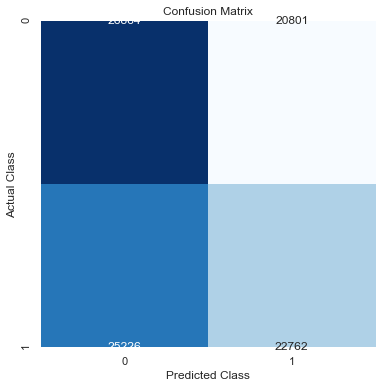

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x_res2,y_res2, test_size=0.3)
t2.fit(X_train,y_train)

test_cf = pd.DataFrame(confusion_matrix(y_test,t2.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

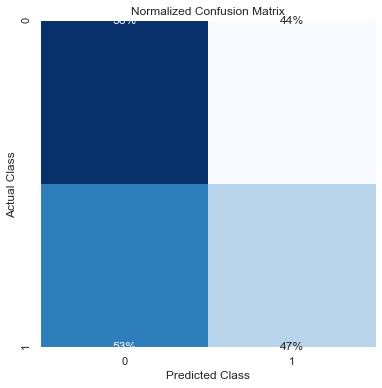

In [58]:
test_cf = confusion_matrix(y_test,t2.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')